<a href="https://colab.research.google.com/github/ParthUpah/RISEN_CS367_LAB_CODES/blob/main/lab6_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Tour:
Start from 1
Go to 6
Go to 4
Go to 9
Go to 3
Go to 10
Go to 7
Go to 5
Go to 8
Go to 2
Return to 1
Minimum Path Cost: 94.96707120985963


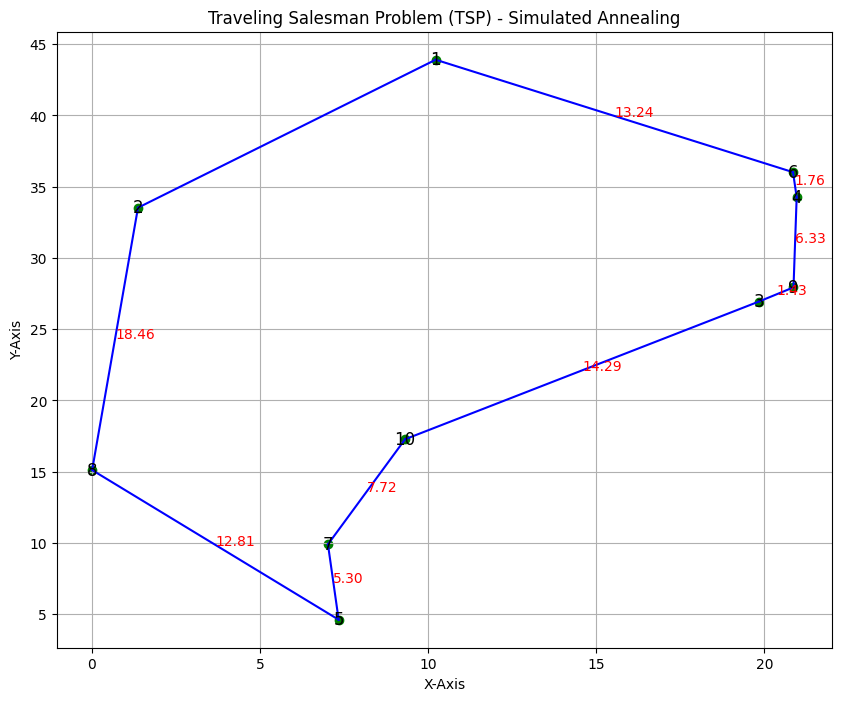

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities with random coordinates
cities = {'1', '2', '3', '4', '5', '6', '7', '8', '9', '10'}

# Generate random coordinates for each city
np.random.seed(1)
city_coordinates = {city: np.random.rand(2) * 50 for city in cities}

# Calculate distances between cities based on coordinates
def calculate_distances(cities):
    n = len(cities)
    distances = np.zeros((n, n))
    city_list = list(cities)
    for i, city_i in enumerate(city_list):
        for j, city_j in enumerate(city_list):
            if i != j:
                distances[i][j] = np.sqrt(np.sum((city_coordinates[city_i] - city_coordinates[city_j]) ** 2))
    return distances, city_list

# Define the TSP solver using Simulated Annealing
class TSPSolverSA:
    def __init__(self, cities, distances):
        self.cities = cities
        self.n = len(cities)
        self.distances = distances
        self.city_list = list(cities)
        self.best_tour = None
        self.best_cost = float('inf')

    def energy(self, tour):
        total = 0
        for i in range(self.n - 1):
            total += self.distances[tour[i]][tour[i + 1]]
        total += self.distances[tour[-1]][tour[0]]  # Return to the starting city
        return total

    def swap(self, tour):
        # Randomly select two cities and swap them
        i, j = np.random.choice(self.n, 2, replace=False)
        tour[i], tour[j] = tour[j], tour[i]

    def solve(self, iterations=100000, initial_temp=1000, cooling_rate=0.9999):
        # Start with a random tour
        current_tour = np.random.permutation(self.n)
        current_cost = self.energy(current_tour)

        self.best_tour = current_tour
        self.best_cost = current_cost

        temperature = initial_temp

        # Simulated annealing loop
        for iteration in range(iterations):
            # Create a neighbor by swapping two cities in the tour
            new_tour = current_tour.copy()
            self.swap(new_tour)
            new_cost = self.energy(new_tour)

            # Accept the new tour based on the energy difference and temperature
            if new_cost < current_cost or np.random.rand() < np.exp((current_cost - new_cost) / temperature):
                current_tour = new_tour
                current_cost = new_cost

                # Update the best tour found
                if current_cost < self.best_cost:
                    self.best_cost = current_cost
                    self.best_tour = current_tour

            # Cooling schedule
            temperature *= cooling_rate

        return self.best_tour, self.best_cost

# Calculate distances
distances, city_list = calculate_distances(cities)

# Create TSP solver instance using Simulated Annealing
tsp_solver = TSPSolverSA(cities, distances)

# Solve TSP
optimal_tour, min_path_cost = tsp_solver.solve()

# Display the solution
print("Optimal Tour:")
for i, city_index in enumerate(optimal_tour):
    if i == 0:
        print(f"Start from {city_list[city_index]}")
    else:
        print(f"Go to {city_list[city_index]}")
print(f"Return to {city_list[optimal_tour[0]]}")

# Display the minimum path cost
print("Minimum Path Cost:", min_path_cost)

# Plot the cities and the tour corresponding to the minimum path cost
plt.figure(figsize=(10, 8))
for city in cities:
    plt.scatter(city_coordinates[city][0], city_coordinates[city][1], color='green')
    plt.text(city_coordinates[city][0], city_coordinates[city][1], city,
             ha='center', va='center', fontsize=12)

# Plot the optimal tour
for i in range(len(optimal_tour) - 1):
    plt.plot([city_coordinates[city_list[optimal_tour[i]]][0],
              city_coordinates[city_list[optimal_tour[i + 1]]][0]],
             [city_coordinates[city_list[optimal_tour[i]]][1],
              city_coordinates[city_list[optimal_tour[i + 1]]][1]], color='blue')
plt.plot([city_coordinates[city_list[optimal_tour[-1]]][0],
          city_coordinates[city_list[optimal_tour[0]]][0]],
         [city_coordinates[city_list[optimal_tour[-1]]][1],
          city_coordinates[city_list[optimal_tour[0]]][1]], color='blue')

# Annotate each path cost along with the path
for i in range(len(optimal_tour) - 1):
    x = (city_coordinates[city_list[optimal_tour[i]]][0] +
         city_coordinates[city_list[optimal_tour[i + 1]]][0]) / 2
    y = (city_coordinates[city_list[optimal_tour[i]]][1] +
         city_coordinates[city_list[optimal_tour[i + 1]]][1]) / 2
    plt.text(x, y, f'{distances[optimal_tour[i], optimal_tour[i + 1]]:.2f}', color='red')

plt.title("Traveling Salesman Problem (TSP) - Simulated Annealing")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.grid(True)
plt.show()
